In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold

from keras.models import Sequential
from keras.layers import Dense

from datetime import datetime


In [2]:
from sklearn import metrics
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import confusion_matrix,classification_report,roc_curve,accuracy_score,auc
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.preprocessing import MinMaxScaler

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [4]:

df = pd.read_csv("smart_grid_stability_augmented.csv")

In [5]:
df.head()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,0.055347,unstable
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,-0.005957,stable
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,0.003471,unstable
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,0.028871,unstable
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,0.049860,unstable


In [6]:
df.drop("stab", axis = 1 , inplace = True)

In [7]:
df.replace(['unstable'],0, inplace= True)

In [8]:
df


,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,0
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,stable
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,0
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,0
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,2.930406,2.376523,9.487627,6.187797,3.343416,-1.449106,-0.658054,-1.236256,0.601709,0.813512,0.779642,0.608385,0
59996,3.392299,2.954947,1.274827,6.894759,4.349512,-0.952437,-1.663661,-1.733414,0.502079,0.285880,0.567242,0.366120,stable
59997,2.364034,8.776391,2.842030,1.008906,4.299976,-0.943884,-1.380719,-1.975373,0.487838,0.149286,0.986505,0.145984,stable
59998,9.631511,2.757071,3.994398,7.821347,2.514755,-0.649915,-0.966330,-0.898510,0.365246,0.889118,0.587558,0.818391,0


In [9]:



df.replace(['stable'],1, inplace= True)

In [10]:
df

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,0
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,1
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,0
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,0
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,2.930406,2.376523,9.487627,6.187797,3.343416,-1.449106,-0.658054,-1.236256,0.601709,0.813512,0.779642,0.608385,0
59996,3.392299,2.954947,1.274827,6.894759,4.349512,-0.952437,-1.663661,-1.733414,0.502079,0.285880,0.567242,0.366120,1
59997,2.364034,8.776391,2.842030,1.008906,4.299976,-0.943884,-1.380719,-1.975373,0.487838,0.149286,0.986505,0.145984,1
59998,9.631511,2.757071,3.994398,7.821347,2.514755,-0.649915,-0.966330,-0.898510,0.365246,0.889118,0.587558,0.818391,0


In [11]:
df1 = df[df.stabf==0]

In [12]:
df1.corr()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stabf
tau1,1.000000,-0.019251,-0.019251,-0.019251,0.023381,-0.013648,-0.013648,-0.013648,0.077912,-0.075923,-0.075923,-0.075923,NaN
tau2,-0.019251,1.000000,-0.014882,-0.014882,0.005404,-0.008697,-0.000383,-0.000383,-0.083801,0.063745,-0.081634,-0.081634,NaN
tau3,-0.019251,-0.014882,1.000000,-0.014882,0.005404,-0.000383,-0.008697,-0.000383,-0.083801,-0.081634,0.063745,-0.081634,NaN
tau4,-0.019251,-0.014882,-0.014882,1.000000,0.005404,-0.000383,-0.000383,-0.008697,-0.083801,-0.081634,-0.081634,0.063745,NaN
p1,0.023381,0.005404,0.005404,0.005404,1.000000,-0.583740,-0.583740,-0.583740,-0.006332,-0.001181,-0.001181,-0.001181,NaN
p2,-0.013648,-0.008697,-0.000383,-0.000383,-0.583740,1.000000,0.011128,0.011128,0.003696,-0.004179,0.003123,0.003123,NaN
p3,-0.013648,-0.000383,-0.008697,-0.000383,-0.583740,0.011128,1.000000,0.011128,0.003696,0.003123,-0.004179,0.003123,NaN
p4,-0.013648,-0.000383,-0.000383,-0.008697,-0.583740,0.011128,0.011128,1.000000,0.003696,0.003123,0.003123,-0.004179,NaN
g1,0.077912,-0.083801,-0.083801,-0.083801,-0.006332,0.003696,0.003696,0.003696,1.000000,-0.064539,-0.064539,-0.064539,NaN
g2,-0.075923,0.063745,-0.081634,-0.081634,-0.001181,-0.004179,0.003123,0.003123,-0.064539,1.000000,-0.074970,-0.074970,NaN


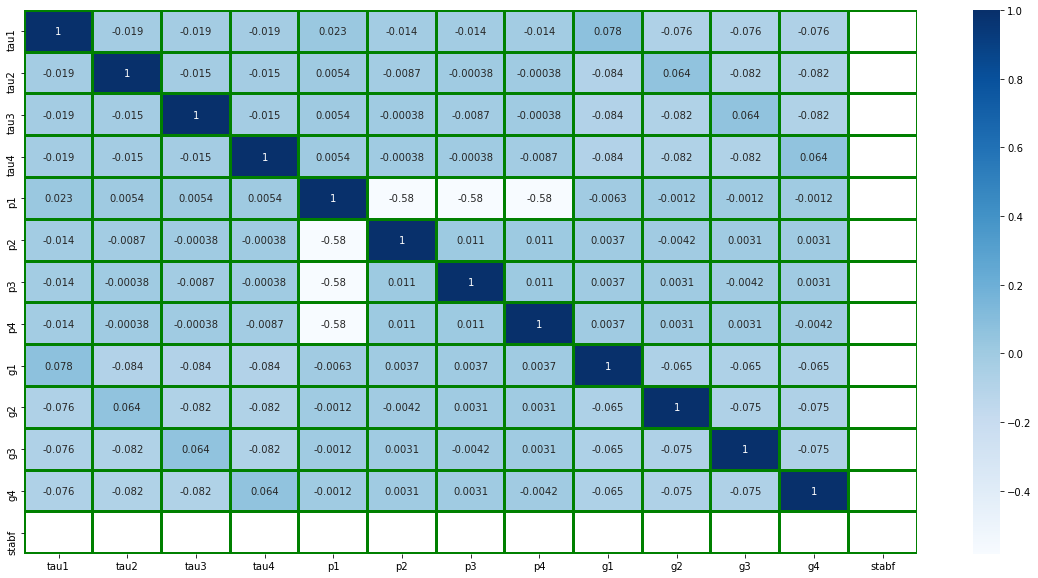

In [13]:
plt.figure(figsize = [20,10])
sns.heatmap(df1.corr(), annot = True, cmap = 'Blues', linecolor = 'g', linewidth = 2)
plt.show()

In [14]:
df2 = df[df.stabf==1]
df2

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stabf
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,1
5,6.999209,9.109247,3.784066,4.267788,4.429669,-1.857139,-0.670397,-1.902133,0.261793,0.077930,0.542884,0.469931,1
8,4.689852,4.007747,1.478573,3.733787,4.041300,-1.410344,-1.238204,-1.392751,0.269708,0.250364,0.164941,0.482439,1
10,5.930110,6.730873,6.245138,0.533288,2.327092,-0.702501,-1.116920,-0.507671,0.239816,0.563110,0.164461,0.753701,1
12,1.616787,2.939228,0.819791,4.191804,3.752282,-1.484885,-1.280581,-0.986816,0.899698,0.866546,0.303921,0.077610,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
59980,4.141337,8.400888,1.112868,1.869624,3.671563,-1.513896,-0.699052,-1.458615,0.081811,0.662959,0.094963,0.169682,1
59983,1.482214,5.220920,3.121273,1.609288,4.394557,-0.881996,-1.924542,-1.588019,0.097309,0.383334,0.096599,0.988509,1
59984,2.501787,7.493896,3.087194,2.177944,3.817471,-1.044281,-0.958986,-1.814205,0.503049,0.534358,0.107808,0.357840,1
59996,3.392299,2.954947,1.274827,6.894759,4.349512,-0.952437,-1.663661,-1.733414,0.502079,0.285880,0.567242,0.366120,1


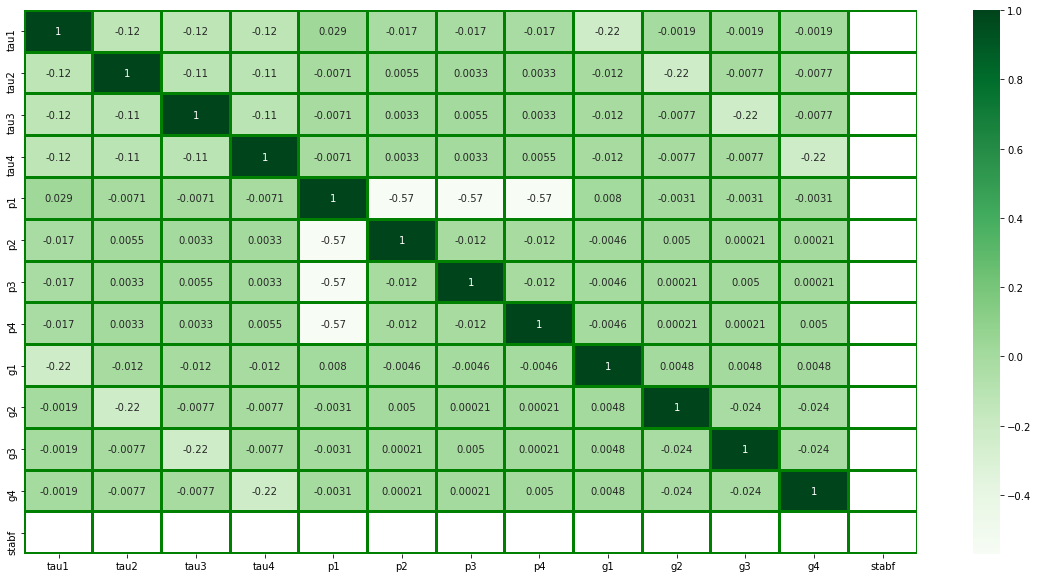

In [15]:
plt.figure(figsize = [20,10])
sns.heatmap(df2.corr(), annot = True, cmap = 'Greens', linecolor = 'g', linewidth = 2)
plt.show()

In [16]:
df

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,0
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,1
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,0
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,0
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,2.930406,2.376523,9.487627,6.187797,3.343416,-1.449106,-0.658054,-1.236256,0.601709,0.813512,0.779642,0.608385,0
59996,3.392299,2.954947,1.274827,6.894759,4.349512,-0.952437,-1.663661,-1.733414,0.502079,0.285880,0.567242,0.366120,1
59997,2.364034,8.776391,2.842030,1.008906,4.299976,-0.943884,-1.380719,-1.975373,0.487838,0.149286,0.986505,0.145984,1
59998,9.631511,2.757071,3.994398,7.821347,2.514755,-0.649915,-0.966330,-0.898510,0.365246,0.889118,0.587558,0.818391,0


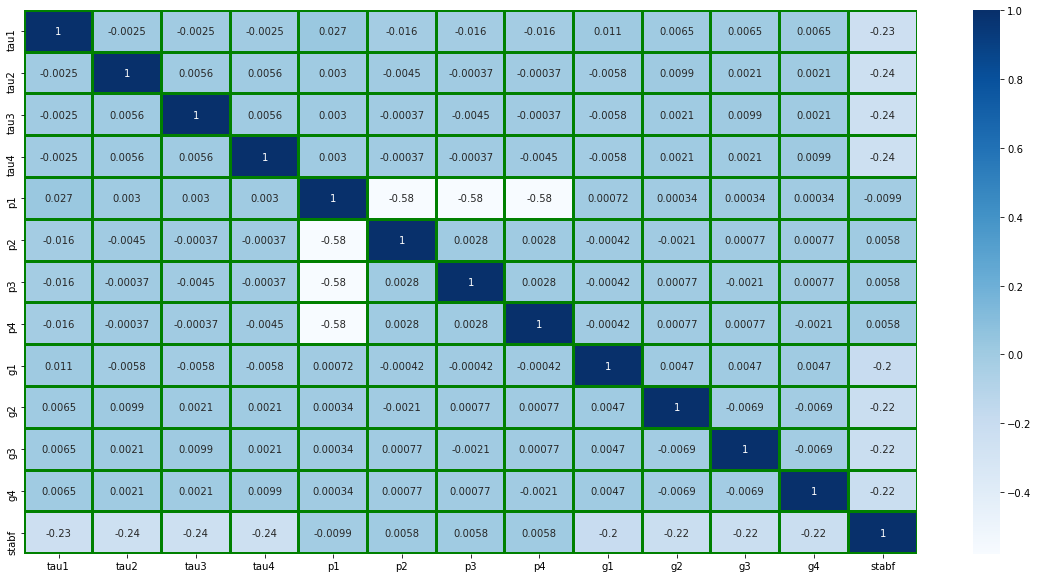

In [17]:
plt.figure(figsize = [20,10])
sns.heatmap(df.corr(), annot = True, cmap = 'Blues', linecolor = 'g', linewidth = 2)
plt.show()

In [18]:
df['stabf'].value_counts()

0    38280
1    21720
Name: stabf, dtype: int64

C:\Users\WoU_AI_ML\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


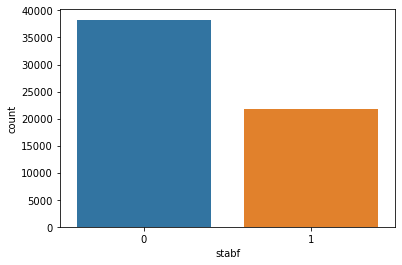

In [19]:
plt.plot(figsize=(5,5))
sns.countplot(df['stabf'])
plt.show()

In [20]:
num_obs = len(df)
num_true = len(df.loc[df['stabf']== 1])
num_false = len(df.loc[df['stabf']== 0])
print("Number of True cases: {0} ({1:2.2f}%)".format(num_true,((1.00*num_true)/(1.0*num_obs))*100))
print("Number of False cases: {0} ({1:2.2f}%)".format(num_false,((1.00*num_false)/(1.0*num_obs))*100))

Number of True cases: 21720 (36.20%)
Number of False cases: 38280 (63.80%)


In [21]:
df.columns

Index(['tau1', 'tau2', 'tau3', 'tau4', 'p1', 'p2', 'p3', 'p4', 'g1', 'g2',
       'g3', 'g4', 'stabf'],
      dtype='object')

In [22]:
feature_col_names = ['tau1', 'tau2', 'tau3', 'tau4', 'p1', 'p2', 'p3', 'p4', 'g1', 'g2','g3', 'g4']
predicted_class_names = ['stabf']
                     

In [23]:
x = df[feature_col_names].values
y= df[predicted_class_names].values
split_test_size = 0.3
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = split_test_size, random_state = 4000)

In [24]:
trainval = (1.0 * len(x_train)) / (1.0 * len(df.index))
testval = (1.0 * len(x_test)) / (1.0 * len(df.index))
print("{0:0.2f}% in training set".format(trainval * 100))
print("{0:0.2f}% in test set".format(testval * 100))

70.00% in training set
30.00% in test set


In [25]:
#Verifying predicted value was split correctly
print("Original True  : {0} ({1:0.2f}%)".format(len(df.loc[df['stabf'] == 1]), (len(df.loc[df['stabf'] == 1])/len(df.index)) * 100.0))
print("Original False : {0} ({1:0.2f}%)".format(len(df.loc[df['stabf'] == 0]), (len(df.loc[df['stabf'] == 0])/len(df.index)) * 100.0))
print("")
print("Training True  : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 1]), (len(y_train[y_train[:] == 1])/len(y_train) * 100.0)))
print("Training False : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 0]), (len(y_train[y_train[:] == 0])/len(y_train) * 100.0)))
print("")
print("Test True      : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 1]), (len(y_test[y_test[:] == 1])/len(y_test) * 100.0)))
print("Test False     : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 0]), (len(y_test[y_test[:] == 0])/len(y_test) * 100.0)))

Original True  : 21720 (36.20%)
Original False : 38280 (63.80%)

Training True  : 15242 (36.29%)
Training False : 26758 (63.71%)

Test True      : 6478 (35.99%)
Test False     : 11522 (64.01%)


## Logistic Regression

In [26]:
lr_model = LogisticRegression(random_state=42)

# this returns array of predicted results from training set
lr_model.fit(x_train, y_train.ravel())
lr_predict_train = lr_model.predict(x_train)

#get accuracy 
accuracy = metrics.accuracy_score(y_train, lr_predict_train)*100

#print accuracy
print ("Accuracy of our DT training model is : {0:.4f}".format(accuracy))

# this returns array of predicted results from testing set
lr_predict_test = lr_model.predict(x_test)

#get accuracy
lr_accuracy_test_data = metrics.accuracy_score(y_test, lr_predict_test)*100

#print accuracy
print ("Accuracy of our DT testing  model is : {0:.4f}".format(lr_accuracy_test_data))

Accuracy of our DT training model is : 81.5429
Accuracy of our DT testing  model is : 81.1500


In [27]:
# Making the Confusion Matrix
results = dict()
train_cm = confusion_matrix(y_train, lr_predict_train)
results['Training'] = {'classification_acc': accuracy_score(y_train, lr_predict_train)*100,
                      'True Positive': train_cm[0,0], 'False Positive': train_cm[0,1],
                      'False Negative': train_cm[1,0], 'True Negative': train_cm[1,1]}

test_cm = confusion_matrix(y_test, lr_predict_test)
results['Test'] = {'classification_acc': accuracy_score(y_test, lr_predict_test)*100,
                      'True Positive': test_cm[0,0], 'False Positive': test_cm[0,1],
                      'False Negative': test_cm[1,0], 'True Negative': test_cm[1,1]}

pd.DataFrame(data=results)

,Training,Test
classification_acc,81.542857,81.15
True Positive,23512.000000,10139.00
False Positive,3246.000000,1383.00
False Negative,4506.000000,2010.00
True Negative,10736.000000,4468.00


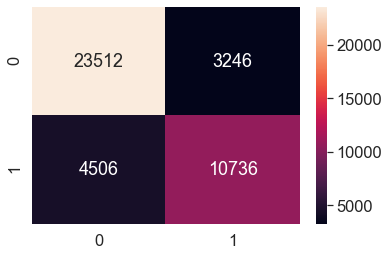

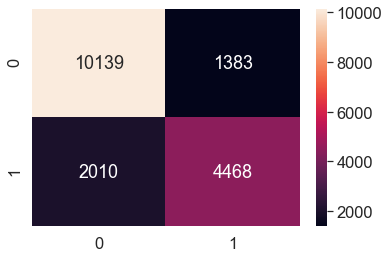

In [28]:
#plot the confusion matrix for training data
sns.set(font_scale=1.5)
cm = confusion_matrix(y_train, lr_predict_train, labels = [0,1])
sns.heatmap(cm, annot=True, fmt='g')
plt.show()

#plot the confusion matrix for testing data
sns.set(font_scale=1.5)
cm = confusion_matrix(y_test, lr_predict_test, labels = [0,1])
sns.heatmap(cm, annot=True, fmt='g')
plt.show()

In [29]:
#Other Measure for Training Set

print('LR Training Set')

#precision/PPV
train_precision = float(train_cm[0,0]) / ((train_cm[0,0]) + train_cm[0,1])
print("Precision: %f" % train_precision)

#Recall/Sensitivity/TPR
train_recall = float(train_cm[0,0]) / ((train_cm[0,0]) + train_cm[1,0])
print("Sensitivity (Recall): %f" % train_recall)

#Specificity/TNR
train_specificity = float(train_cm[1,1]) / ((train_cm[1,1]) + train_cm[0,1])
print("Specificity: %f" % train_specificity)

#False Positive Rate
train_fpr = float(train_cm[0,1]) / ((train_cm[0,1]) + train_cm[1,1])
print("False Positive Rate: %f" % train_fpr)

#False Negative Rate
train_fnr = float(train_cm[1,0]) / ((train_cm[1,0]) + train_cm[0,0])
print("False Negative Rate: %f" % train_fnr)

#F-1 Score/Measures
train_f1 = 2 * (train_precision * train_recall) / (train_precision + train_recall)
print("F1 score: %f" % train_f1)

#Negative Predicted Rate
train_npv = float(train_cm[1,1]) / ((train_cm[1,1]) + train_cm[1,0])
print(" Negative predictive value: %f" % train_npv)
print(" ")


#Other Measure for Testing Set

print('LR Testing Set')

#precision/PPV
test_precision = float(test_cm[0,0]) / ((test_cm[0,0]) + test_cm[0,1])
print("Precision: %f" % test_precision)

#Recall/Sensitivity/TPR
test_recall = float(test_cm[0,0]) / ((test_cm[0,0]) + test_cm[1,0])
print("Sensitivity (Recall): %f" % test_recall)

#Specificity/TNR
test_specificity = float(test_cm[1,1]) / ((test_cm[1,1]) + test_cm[0,1])
print("Specificity: %f" % test_specificity)

#False Positive Rate
test_fpr = float(test_cm[0,1]) / ((test_cm[0,1]) + test_cm[1,1])
print("False Positive Rate: %f" % test_fpr)

#False Negative Rate
test_fnr = float(test_cm[1,0]) / ((test_cm[1,0]) + test_cm[0,0])
print("False Negative Rate: %f" % test_fnr)

#F-1 Score/Measures
test_f1 = 2 * (test_precision * test_recall) / (test_precision + test_recall)
print("F1 score: %f" % test_f1)

#Negative Predicted Rate
test_npv = float(test_cm[1,1]) / ((test_cm[1,1]) + test_cm[1,0])
print("Negative predictive value: %f" % test_npv)
print(" ")


LR Training Set
Precision: 0.878690
Sensitivity (Recall): 0.839175
Specificity: 0.767844
False Positive Rate: 0.232156
False Negative Rate: 0.160825
F1 score: 0.858478
 Negative predictive value: 0.704370
 
LR Testing Set
Precision: 0.879969
Sensitivity (Recall): 0.834554
Specificity: 0.763630
False Positive Rate: 0.236370
False Negative Rate: 0.165446
F1 score: 0.856660
Negative predictive value: 0.689719
 


# Algorithm - Naive Bayes

In [30]:
#create Gaussian Naive Bayes model object and train it with the data

nb_model = RandomForestClassifier(random_state=5000)
nb_model.fit(x_train, y_train.ravel())

#Predict training data
nb_predict_train = nb_model.predict(x_train)

#get accuracy
nb_accuracy = metrics.accuracy_score(y_train, nb_predict_train)*100

#print accuracy
print ("Accuracy of our RF training  model is : {0:.4f}".format(nb_accuracy))

#Predict test data
nb_predict_test = nb_model.predict(x_test)

#get accuracy
nb_accuracy_test_data = metrics.accuracy_score(y_test, nb_predict_test)*100

#print accuracy
print ("Accuracy of our RF testing   model is : {0:.4f}".format(nb_accuracy_test_data))

Accuracy of our RF training  model is : 100.0000
Accuracy of our RF testing   model is : 94.8611


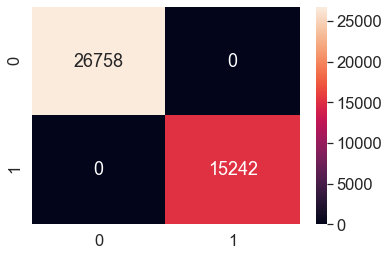

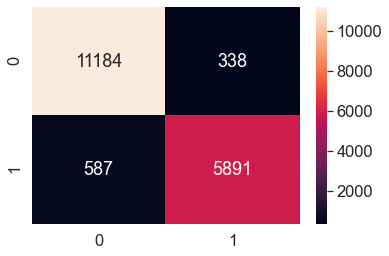

In [31]:
#plot the confusion matrix for training data
sns.set(font_scale=1.5)
cm = confusion_matrix(y_train, nb_predict_train, labels = [0,1])
sns.heatmap(cm, annot=True, fmt='g')
plt.show()

#plot the confusion matrix for testing data
sns.set(font_scale=1.5)
cm = confusion_matrix(y_test, nb_predict_test, labels = [0,1])
sns.heatmap(cm, annot=True, fmt='g')
plt.show()

In [32]:
#Other Measure for Training Set
print('NB Training Set')

#precision/PPV
train_precision = float(train_cm[0,0]) / ((train_cm[0,0]) + train_cm[0,1])
print("Precision: %f" % train_precision)

#Recall/Sensitivity/TPR
train_recall = float(train_cm[0,0]) / ((train_cm[0,0]) + train_cm[1,0])
print("Sensitivity (Recall): %f" % train_recall)

#Specificity/TNR
train_specificity = float(train_cm[1,1]) / ((train_cm[1,1]) + train_cm[0,1])
print("Specificity: %f" % train_specificity)

#False Positive Rate
train_fpr = float(train_cm[0,1]) / ((train_cm[0,1]) + train_cm[1,1])
print("False Positive Rate: %f" % train_fpr)

#False Negative Rate
train_fnr = float(train_cm[1,0]) / ((train_cm[1,0]) + train_cm[0,0])
print("False Negative Rate: %f" % train_fnr)

#F-1 Score/Measures
train_f1 = 2 * (train_precision * train_recall) / (train_precision + train_recall)
print("F1 score: %f" % train_f1)

#Negative Predicted Rate
train_npv = float(train_cm[1,1]) / ((train_cm[1,1]) + train_cm[1,0])
print("Negative predictive value: %f" % train_npv)
print(" ")

#Other Measure for Testing Set
print('NB Testing Set')

#precision/PPV
test_precision = float(test_cm[0,0]) / ((test_cm[0,0]) + test_cm[0,1])
print("Precision: %f" % test_precision)

#Recall/Sensitivity/TPR
test_recall = float(test_cm[0,0]) / ((test_cm[0,0]) + test_cm[1,0])
print("Sensitivity (Recall): %f" % test_recall)

#Specificity/TNR
test_specificity = float(test_cm[1,1]) / ((test_cm[1,1]) + test_cm[0,1])
print("Specificity: %f" % test_specificity)

#False Positive Rate
test_fpr = float(test_cm[0,1]) / ((test_cm[0,1]) + test_cm[1,1])
print("False Positive Rate: %f" % test_fpr)

#False Negative Rate
test_fnr = float(test_cm[1,0]) / ((test_cm[1,0]) + test_cm[0,0])
print("False Negative Rate: %f" % test_fnr)

#F-1 Score/Measures
test_f1 = 2 * (test_precision * test_recall) / (test_precision + test_recall)
print("F1 score: %f" % test_f1)

#Negative Predicted Rate
test_npv = float(test_cm[1,1]) / ((test_cm[1,1]) + test_cm[1,0])
print("Negative predictive value: %f" % test_npv)
print(" ")

NB Training Set
Precision: 0.878690
Sensitivity (Recall): 0.839175
Specificity: 0.767844
False Positive Rate: 0.232156
False Negative Rate: 0.160825
F1 score: 0.858478
Negative predictive value: 0.704370
 
NB Testing Set
Precision: 0.879969
Sensitivity (Recall): 0.834554
Specificity: 0.763630
False Positive Rate: 0.236370
False Negative Rate: 0.165446
F1 score: 0.856660
Negative predictive value: 0.689719
 


# support vector machine model


In [33]:
# create SVM model object and train it with the data
svm_model = SVC(kernel='linear', C=1, random_state=42)
svm_model.fit(x_train, y_train.ravel())

# this returns array of predicted results from training data
svm_predict_train = svm_model.predict(x_train)
#get accuracy
accuracy = metrics.accuracy_score(y_train, svm_predict_train)*100
#print accuracy
print ("Accuracy of our SVM training model is : {0:.4f}".format(accuracy))

# this returns array of predicted results from testing data
svm_predict_test = svm_model.predict(x_test)
#get accuracy
svm_accuracy_test = metrics.accuracy_score(y_test, svm_predict_test)*100
#print accuracy
print ("Accuracy of our SVM testing  model is : {0:.4f}".format(svm_accuracy_test))

Accuracy of our SVM training model is : 81.5643
Accuracy of our SVM testing  model is : 81.1222


In [34]:
# Making the Confusion Matrix
results = dict()
train_cm = confusion_matrix(y_train, svm_predict_train)
results['Training'] = {'classification_acc': accuracy_score(y_train, svm_predict_train)*100,
                      'True Positive': train_cm[0,0], 'False Positive': train_cm[0,1],
                      'False Negative': train_cm[1,0], 'True Negative': train_cm[1,1]}

test_cm = confusion_matrix(y_test, svm_predict_test)
results['Test'] = {'classification_acc': accuracy_score(y_test, svm_predict_test)*100,
                      'True Positive': test_cm[0,0], 'False Positive': test_cm[0,1],
                      'False Negative': test_cm[1,0], 'True Negative': test_cm[1,1]}

pd.DataFrame(data=results)

,Training,Test
classification_acc,81.564286,81.122222
True Positive,23551.000000,10145.000000
False Positive,3207.000000,1377.000000
False Negative,4536.000000,2021.000000
True Negative,10706.000000,4457.000000


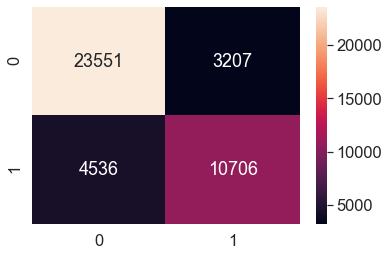

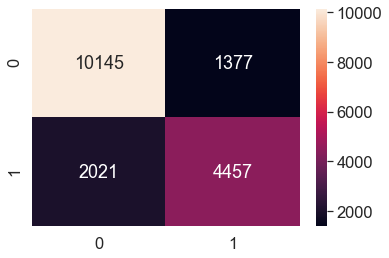

In [35]:
#plot the confusion matrix for training data
sns.set(font_scale=1.5)
cm = confusion_matrix(y_train, svm_predict_train, labels = [0,1])
sns.heatmap(cm, annot=True, fmt='g')
plt.show()

#plot the confusion matrix for testing data
sns.set(font_scale=1.5)
cm = confusion_matrix(y_test, svm_predict_test, labels = [0,1])
sns.heatmap(cm, annot=True, fmt='g')
plt.show()

In [36]:
#Other Measure for Training Set
print('SVM Training Set')

#precision/PPV
train_precision = float(train_cm[0,0]) / ((train_cm[0,0]) + train_cm[0,1])
print("Precision: %f" % train_precision)

#Recall/Sensitivity/TPR
train_recall = float(train_cm[0,0]) / ((train_cm[0,0]) + train_cm[1,0])
print("Sensitivity (Recall): %f" % train_recall)

#Specificity/TNR
train_specificity = float(train_cm[1,1]) / ((train_cm[1,1]) + train_cm[0,1])
print("Specificity: %f" % train_specificity)

#False Positive Rate
train_fpr = float(train_cm[0,1]) / ((train_cm[0,1]) + train_cm[1,1])
print("False Positive Rate: %f" % train_fpr)

#False Negative Rate
train_fnr = float(train_cm[1,0]) / ((train_cm[1,0]) + train_cm[0,0])
print("False Negative Rate: %f" % train_fnr)

#F-1 Score/Measures
train_f1 = 2 * (train_precision * train_recall) / (train_precision + train_recall)
print("F1 score: %f" % train_f1)

#Negative Predicted Rate
train_npv = float(train_cm[1,1]) / ((train_cm[1,1]) + train_cm[1,0])
print("Negative predictive value: %f" % train_npv)
print(" ")

#Other Measure for Testing Set
print('SVM Testing Set')

#precision/PPV
test_precision = float(test_cm[0,0]) / ((test_cm[0,0]) + test_cm[0,1])
print("Precision: %f" % test_precision)

#Recall/Sensitivity/TPR
test_recall = float(test_cm[0,0]) / ((test_cm[0,0]) + test_cm[1,0])
print("Sensitivity (Recall): %f" % test_recall)

#Specificity/TNR
test_specificity = float(test_cm[1,1]) / ((test_cm[1,1]) + test_cm[0,1])
print("Specificity: %f" % test_specificity)

#False Positive Rate
test_fpr = float(test_cm[0,1]) / ((test_cm[0,1]) + test_cm[1,1])
print("False Positive Rate: %f" % test_fpr)

#False Negative Rate
test_fnr = float(test_cm[1,0]) / ((test_cm[1,0]) + test_cm[0,0])
print("False Negative Rate: %f" % test_fnr)

#F-1 Score/Measures
test_f1 = 2 * (test_precision * test_recall) / (test_precision + test_recall)
print("F1 score: %f" % test_f1)

#Negative Predicted Rate
test_npv = float(test_cm[1,1]) / ((test_cm[1,1]) + test_cm[1,0])
print("Negative predictive value: %f" % test_npv)
print(" ")

SVM Training Set
Precision: 0.880148
Sensitivity (Recall): 0.838502
Specificity: 0.769496
False Positive Rate: 0.230504
False Negative Rate: 0.161498
F1 score: 0.858820
Negative predictive value: 0.702401
 
SVM Testing Set
Precision: 0.880489
Sensitivity (Recall): 0.833881
Specificity: 0.763970
False Positive Rate: 0.236030
False Negative Rate: 0.166119
F1 score: 0.856552
Negative predictive value: 0.688021
 


## Algorithm - Decision Tree

In [37]:
# create DT model object and train it with the data
dt_model = DecisionTreeClassifier(random_state=5000)

# this returns array of predicted results from training set
dt_model.fit(x_train, y_train.ravel())
dt_predict_train = dt_model.predict(x_train)
#get accuracy
accuracy = metrics.accuracy_score(y_train, dt_predict_train)*100
#print accuracy
print ("Accuracy of our DT training model is : {0:.4f}".format(accuracy))

# this returns array of predicted results from testing set
dt_predict_test = dt_model.predict(x_test)
#get accuracy
dt_accuracy_test_data = metrics.accuracy_score(y_test, dt_predict_test)*100
#print accuracy
print ("Accuracy of our DT testing  model is : {0:.4f}".format(dt_accuracy_test_data))

Accuracy of our DT training model is : 100.0000
Accuracy of our DT testing  model is : 89.0500


In [38]:
# Making the Confusion Matrix
results = dict()
train_cm = confusion_matrix(y_train, dt_predict_train)
results['Training'] = {'classification_acc': accuracy_score(y_train, dt_predict_train)*100,
                      'True Positive': train_cm[0,0], 'False Positive': train_cm[0,1],
                      'False Negative': train_cm[1,0], 'True Negative': train_cm[1,1]}

test_cm = confusion_matrix(y_test, dt_predict_test)
results['Test'] = {'classification_acc': accuracy_score(y_test, dt_predict_test)*100,
                      'True Positive': test_cm[0,0], 'False Positive': test_cm[0,1],
                      'False Negative': test_cm[1,0], 'True Negative': test_cm[1,1]}

pd.DataFrame(data=results)

,Training,Test
classification_acc,100.0,89.05
True Positive,26758.0,10559.00
False Positive,0.0,963.00
False Negative,0.0,1008.00
True Negative,15242.0,5470.00


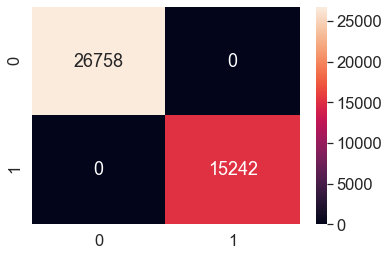

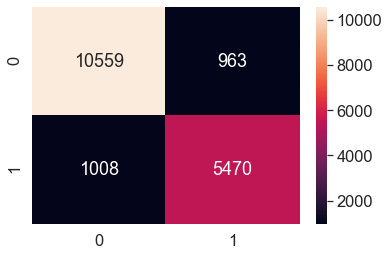

In [39]:
#plot the confusion matrix for training data
sns.set(font_scale=1.5)
cm = confusion_matrix(y_train, dt_predict_train, labels = [0,1])
sns.heatmap(cm, annot=True, fmt='g')
plt.show()

#plot the confusion matrix for testing data
sns.set(font_scale=1.5)
cm = confusion_matrix(y_test, dt_predict_test, labels = [0,1])
sns.heatmap(cm, annot=True, fmt='g')
plt.show()

In [40]:
#Other Measure for Training Set
print('DT Training Set')

#precision/PPV
train_precision = float(train_cm[0,0]) / ((train_cm[0,0]) + train_cm[0,1])
print("Precision: %f" % train_precision)

#Recall/Sensitivity/TPR
train_recall = float(train_cm[0,0]) / ((train_cm[0,0]) + train_cm[1,0])
print("Sensitivity (Recall): %f" % train_recall)

#Specificity/TNR
train_specificity = float(train_cm[1,1]) / ((train_cm[1,1]) + train_cm[0,1])
print("Specificity: %f" % train_specificity)

#False Positive Rate
train_fpr = float(train_cm[0,1]) / ((train_cm[0,1]) + train_cm[1,1])
print("False Positive Rate: %f" % train_fpr)

#False Negative Rate
train_fnr = float(train_cm[1,0]) / ((train_cm[1,0]) + train_cm[0,0])
print("False Negative Rate: %f" % train_fnr)

#F-1 Score/Measures
train_f1 = 2 * (train_precision * train_recall) / (train_precision + train_recall)
print("F1 score: %f" % train_f1)

#Negative Predicted Rate
train_npv = float(train_cm[1,1]) / ((train_cm[1,1]) + train_cm[1,0])
print("Negative predictive value: %f" % train_npv)
print(" ")

#Other Measure for Testing Set
print('DT Testing Set')

#precision/PPV
test_precision = float(test_cm[0,0]) / ((test_cm[0,0]) + test_cm[0,1])
print("Precision: %f" % test_precision)

#Recall/Sensitivity/TPR
test_recall = float(test_cm[0,0]) / ((test_cm[0,0]) + test_cm[1,0])
print("Sensitivity (Recall): %f" % test_recall)

#Specificity/TNR
test_specificity = float(test_cm[1,1]) / ((test_cm[1,1]) + test_cm[0,1])
print("Specificity: %f" % test_specificity)

#False Positive Rate
test_fpr = float(test_cm[0,1]) / ((test_cm[0,1]) + test_cm[1,1])
print("False Positive Rate: %f" % test_fpr)

#False Negative Rate
test_fnr = float(test_cm[1,0]) / ((test_cm[1,0]) + test_cm[0,0])
print("False Negative Rate: %f" % test_fnr)

#F-1 Score/Measures
test_f1 = 2 * (test_precision * test_recall) / (test_precision + test_recall)
print("F1 score: %f" % test_f1)

#Negative Predicted Rate
test_npv = float(test_cm[1,1]) / ((test_cm[1,1]) + test_cm[1,0])
print("Negative predictive value: %f" % test_npv)
print(" ")

DT Training Set
Precision: 1.000000
Sensitivity (Recall): 1.000000
Specificity: 1.000000
False Positive Rate: 0.000000
False Negative Rate: 0.000000
F1 score: 1.000000
Negative predictive value: 1.000000
 
DT Testing Set
Precision: 0.916421
Sensitivity (Recall): 0.912856
Specificity: 0.850303
False Positive Rate: 0.149697
False Negative Rate: 0.087144
F1 score: 0.914635
Negative predictive value: 0.844396
 


## Random Forest

In [41]:
# Create a RandomForestClassifier object and train it with the data
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(x_train, y_train.ravel())

#Predict training data
rf_predict_train = rf_model.predict(x_train)
#get accuracy
rf_accuracy = metrics.accuracy_score(y_train, rf_predict_train)*100
#print accuracy
print ("Accuracy of our RF training  model is : {0:.4f}".format(rf_accuracy))

#Predict test data
rf_predict_test = rf_model.predict(x_test)
#get accuracy
rf_accuracy_test_data = metrics.accuracy_score(y_test, rf_predict_test)*100
#print accuracy
print ("Accuracy of our RF testing   model is : {0:.4f}".format(rf_accuracy_test_data))

Accuracy of our RF training  model is : 100.0000
Accuracy of our RF testing   model is : 94.8444


In [42]:
# Making the Confusion Matrix
results = dict()
train_cm = confusion_matrix(y_train, rf_predict_train)
results['Training'] = {'classification_acc': accuracy_score(y_train, rf_predict_train)*100,
                      'True Positive': train_cm[0,0], 'False Positive': train_cm[0,1],
                      'False Negative': train_cm[1,0], 'True Negative': train_cm[1,1]}

test_cm = confusion_matrix(y_test, rf_predict_test)
results['Test'] = {'classification_acc': accuracy_score(y_test, rf_predict_test)*100,
                      'True Positive': test_cm[0,0], 'False Positive': test_cm[0,1],
                      'False Negative': test_cm[1,0], 'True Negative': test_cm[1,1]}

pd.DataFrame(data=results)

,Training,Test
classification_acc,100.0,94.844444
True Positive,26758.0,11189.000000
False Positive,0.0,333.000000
False Negative,0.0,595.000000
True Negative,15242.0,5883.000000


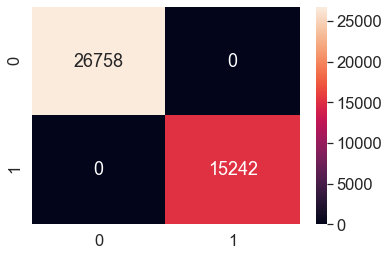

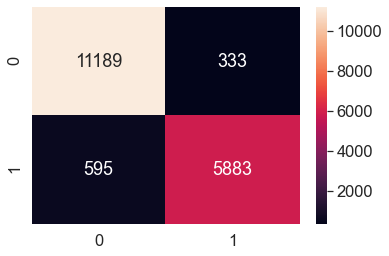

In [43]:
#plot the confusion matrix for training data
sns.set(font_scale=1.5)
cm = confusion_matrix(y_train, rf_predict_train, labels = [0,1])
sns.heatmap(cm, annot=True, fmt='g')
plt.show()

#plot the confusion matrix for testing data
sns.set(font_scale=1.5)
cm = confusion_matrix(y_test, rf_predict_test, labels = [0,1])
sns.heatmap(cm, annot=True, fmt='g')
plt.show()

In [44]:
#Other Measure for Training Set
print('RF Training Set')

#precision/PPV
train_precision = float(train_cm[0,0]) / ((train_cm[0,0]) + train_cm[0,1])
print("Precision: %f" % train_precision)

#Recall/Sensitivity/TPR
train_recall = float(train_cm[0,0]) / ((train_cm[0,0]) + train_cm[1,0])
print("Sensitivity (Recall): %f" % train_recall)

#Specificity/TNR
train_specificity = float(train_cm[1,1]) / ((train_cm[1,1]) + train_cm[0,1])
print("Specificity: %f" % train_specificity)

#False Positive Rate
train_fpr = float(train_cm[0,1]) / ((train_cm[0,1]) + train_cm[1,1])
print("False Positive Rate: %f" % train_fpr)

#False Negative Rate
train_fnr = float(train_cm[1,0]) / ((train_cm[1,0]) + train_cm[0,0])
print("False Negative Rate: %f" % train_fnr)

#F-1 Score/Measures
train_f1 = 2 * (train_precision * train_recall) / (train_precision + train_recall)
print("F1 score: %f" % train_f1)

#Negative Predicted Rate
train_npv = float(train_cm[1,1]) / ((train_cm[1,1]) + train_cm[1,0])
print("Negative predictive value: %f" % train_npv)
print(" ")

#Other Measure for Testing Set
print('RF Testing Set')

#precision/PPV
test_precision = float(test_cm[0,0]) / ((test_cm[0,0]) + test_cm[0,1])
print("Precision: %f" % test_precision)

#Recall/Sensitivity/TPR
test_recall = float(test_cm[0,0]) / ((test_cm[0,0]) + test_cm[1,0])
print("Sensitivity (Recall): %f" % test_recall)

#Specificity/TNR
test_specificity = float(test_cm[1,1]) / ((test_cm[1,1]) + test_cm[0,1])
print("Specificity: %f" % test_specificity)

#False Positive Rate
test_fpr = float(test_cm[0,1]) / ((test_cm[0,1]) + test_cm[1,1])
print("False Positive Rate: %f" % test_fpr)

#False Negative Rate
test_fnr = float(test_cm[1,0]) / ((test_cm[1,0]) + test_cm[0,0])
print("False Negative Rate: %f" % test_fnr)

#F-1 Score/Measures
test_f1 = 2 * (test_precision * test_recall) / (test_precision + test_recall)
print("F1 score: %f" % test_f1)

#Negative Predicted Rate
test_npv = float(test_cm[1,1]) / ((test_cm[1,1]) + test_cm[1,0])
print("Negative predictive value: %f" % test_npv)
print(" ")

RF Training Set
Precision: 1.000000
Sensitivity (Recall): 1.000000
Specificity: 1.000000
False Positive Rate: 0.000000
False Negative Rate: 0.000000
F1 score: 1.000000
Negative predictive value: 1.000000
 
RF Testing Set
Precision: 0.971099
Sensitivity (Recall): 0.949508
Specificity: 0.946429
False Positive Rate: 0.053571
False Negative Rate: 0.050492
F1 score: 0.960182
Negative predictive value: 0.908151
 


In [45]:
#LR_accuracy_train = 95.3417
LR_accuracy_test = 95.6944
#NB_accuracy_train = 100
NB_accuracy_test = 100
#SVM_accuracy_train = 98.100
SVM_accuracy_test = 98.2389
#DT_accuracy_train = 100
DT_accuracy_test = 100
#RF_accuracy_train = 100
RF_accuracy_test = 100

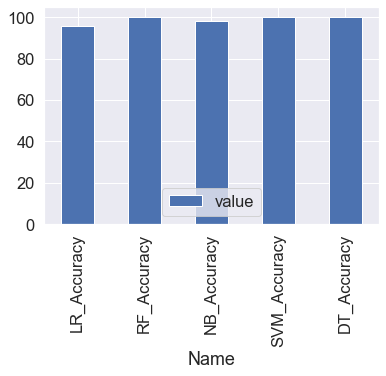

In [46]:
data = {'Name':['LR_Accuracy','RF_Accuracy','NB_Accuracy','SVM_Accuracy','DT_Accuracy'],
    'value': [ LR_accuracy_test, NB_accuracy_test, SVM_accuracy_test, DT_accuracy_test, RF_accuracy_test] }
df = pd.DataFrame(data)
df.plot(y ='value', x='Name', kind = 'bar')
plt.show()